## Question 1: Best Sellers Rank Analysis

In [1]:
%%capture
# install libraries
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn

In [2]:
## Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('icefire')

import warnings
warnings.filterwarnings('ignore')

### Data loading and preprocessing

In [3]:
# load data
df = pd.read_csv('Steven_S_Skiena_books.csv')

In [4]:
## Data cleanup

# convert date string to pandas date
df['Publication Date'] = pd.to_datetime(df['Publication Date'], format = '%m/%d/%y')

# cleanup
df = df.dropna(how = 'all', axis = 0)

for f in ['Hardcover Rank', 'Kindle Edition Rank', 'Paperback Rank', 'Goodreads_number_of_ratings']:
    df[f] = df[f].apply(lambda x: None if x is np.nan else int(x.replace(',', '')))

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 6
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           7 non-null      float64       
 1   Title                        7 non-null      object        
 2   Publication Date             7 non-null      datetime64[ns]
 3   ISBN                         7 non-null      object        
 4   Hardcover Rank               5 non-null      float64       
 5   Kindle Edition Rank          6 non-null      float64       
 6   Paperback Rank               5 non-null      float64       
 7   Amazon_average_rating        7 non-null      float64       
 8   Amazon_number_of_ratings     7 non-null      float64       
 9   Goodreads_average_rating     5 non-null      float64       
 10  Goodreads_number_of_ratings  5 non-null      float64       
 11  Hardcover Price              6 non-null      float64  

In [5]:
df

,ID,Title,Publication Date,ISBN,Hardcover Rank,Kindle Edition Rank,Paperback Rank,Amazon_average_rating,Amazon_number_of_ratings,Goodreads_average_rating,Goodreads_number_of_ratings,Hardcover Price,Kindle edition Price,Paperback Price
0,1.0,The Algorithm Design Manual (Texts in Computer...,2020-10-05,978-3030542559,97036.0,263993.0,116103.0,4.4,347.0,4.3,2578.0,61.07,43.13,45.00
1,2.0,The Data Science Design Manual (Texts in Compu...,2017-07-01,978-3319554433,353548.0,1272604.0,2856331.0,4.6,80.0,4.5,57.0,38.96,47.11,49.99
2,3.0,"Calculated Bets: Computers, Gambling, and Math...",2001-08-06,978-0521804264,3897700.0,1466172.0,1892237.0,4.2,37.0,3.9,90.0,39.85,26.60,28.00
3,4.0,Programming Challenges: The Programming Contes...,2003-01-01,978-0387001630,NaN,807779.0,1181087.0,4.3,46.0,4.1,128.0,NaN,63.99,39.00
4,5.0,Implementing Discrete Mathematics: Combinatori...,1990-01-21,978-0201509434,6257046.0,NaN,NaN,3.0,2.0,NaN,NaN,14.36,NaN,54.00
5,6.0,Who's Bigger?: Where Historical Figures Really...,2013-10-14,978-1107041370,NaN,1984631.0,NaN,4.0,29.0,3.8,45.0,27.82,24.49,NaN
6,7.0,Computational Discrete Mathematics: Combinator...,2003-12-08,978-0521806862,4792580.0,2893874.0,4722544.0,3.7,9.0,NaN,NaN,9.17,59.99,59.99


### Data Analysis and Visualization:
- Plot the rank of all of Skiena's books over time. Use appropriate visualization tools like line graphs or scatter plots.
- Analyze the trend and discuss any patterns you observe.

In [6]:
### Ranking System
# Amazon have 3 best seller rank for each format in which the book published (hardcover, kindle edition, and paperback). However, the system provided aggregated single mean ranking, which is estimated accorss all the formats. For simplicity, we will take average of the three it will be used throughout.
df['avg_best_seller_rank'] = df[['Hardcover Rank', 'Kindle Edition Rank', 'Paperback Rank']].mean(axis = 1)

# Similarly we have average rating from both the Amazon and Goodreads consumers. We estimate weighted rating weighted on the number of rating from respective platforms.
## repalce missing rating from either platform to 0 (not applicable)
cols = ['Amazon_number_of_ratings', 'Goodreads_number_of_ratings', 'Amazon_average_rating', 'Goodreads_average_rating']
df[cols] = df[cols].fillna(0)


df['sum_rating'] = df[['Amazon_number_of_ratings', 'Goodreads_number_of_ratings']].sum(axis = 1)
df['weighted_rating'] = (1/df['sum_rating']) * ((df['Amazon_average_rating'] * df['Amazon_number_of_ratings']) + (df['Goodreads_average_rating'] * df['Goodreads_number_of_ratings']))

cols = ['ID', 'Title', 'Publication Date', 'ISBN', 'avg_best_seller_rank', 'weighted_rating']
df = df[cols]
df['Publication Date'] = df['Publication Date'].dt.date
df

,ID,Title,Publication Date,ISBN,avg_best_seller_rank,weighted_rating
0,1.0,The Algorithm Design Manual (Texts in Computer...,2020-10-05,978-3030542559,1.590440e+05,4.311863
1,2.0,The Data Science Design Manual (Texts in Compu...,2017-07-01,978-3319554433,1.494161e+06,4.558394
2,3.0,"Calculated Bets: Computers, Gambling, and Math...",2001-08-06,978-0521804264,2.418703e+06,3.987402
3,4.0,Programming Challenges: The Programming Contes...,2003-01-01,978-0387001630,9.944330e+05,4.152874
4,5.0,Implementing Discrete Mathematics: Combinatori...,1990-01-21,978-0201509434,6.257046e+06,3.000000
5,6.0,Who's Bigger?: Where Historical Figures Really...,2013-10-14,978-1107041370,1.984631e+06,3.878378
6,7.0,Computational Discrete Mathematics: Combinator...,2003-12-08,978-0521806862,4.136333e+06,3.700000


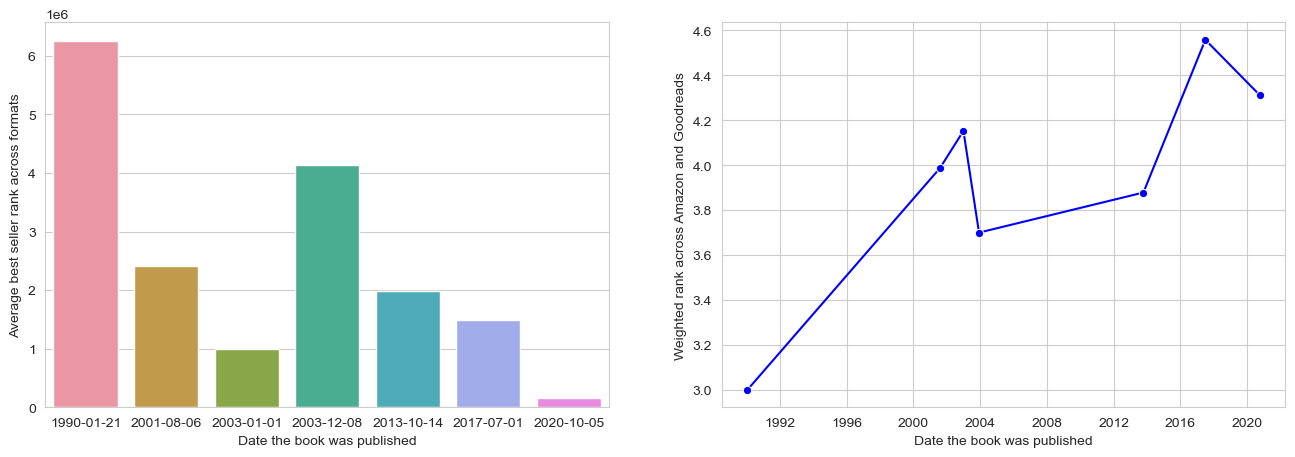

In [7]:
df = df.sort_values(by = 'Publication Date', ascending=True)

# Plotting ranking over the publication date
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.barplot(data = df, x = 'Publication Date', y = 'avg_best_seller_rank', ax = ax[0])
sns.lineplot(data = df, x = 'Publication Date', y = 'weighted_rating', ci = False, marker = 'o', ax = ax[1], color = 'blue')
ax[0].set_xlabel('Date the book was published')
ax[0].set_ylabel('Average best seller rank across formats')

ax[1].set_xlabel('Date the book was published')
ax[1].set_ylabel('Weighted rank across Amazon and Goodreads')

plt.show()

We observe inverse ralationship between best seller rank and weighted rating across Amazon and Goodreads. It is important to note that the lowe rating books are published between 1990 and 2003, and many academic professor may recommend newer books for the relevance. Between 2017 and 2020 there book the author published are highly rated and ranked lower on best seller list by Amazon.

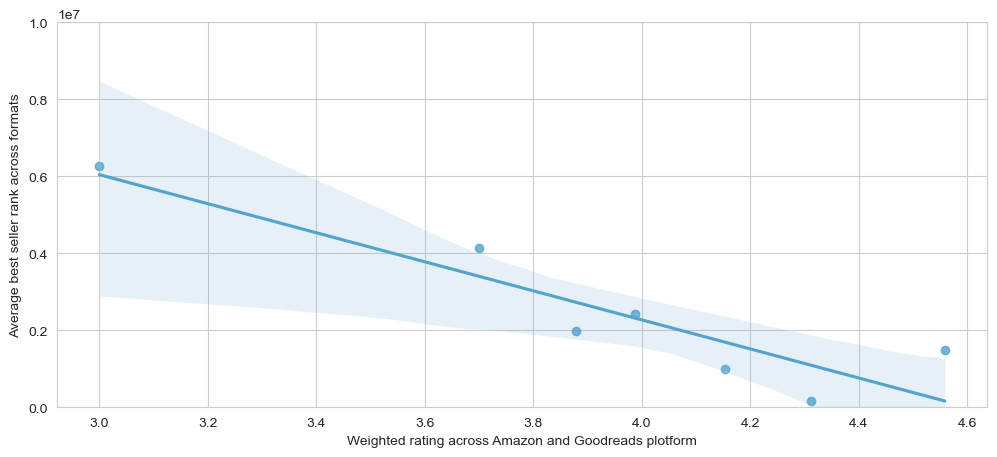

In [8]:
# relationship between Average rank and weighted rank
plt.figure(figsize=(12, 5))
sns.regplot(data = df, x = 'weighted_rating', y = 'avg_best_seller_rank')
plt.ylim([0, 10e6])
plt.xlabel("Weighted rating across Amazon and Goodreads plotform")
plt.ylabel('Average best seller rank across formats')
plt.show()

From the above table, we observe that the number of user rating a book is highly skewed. It is hard to decipher Amazon's rating system just by looking average rating and we have to consider total number of users rated as well. It is important to note that consumer ratings is dependent on the published date as well.

However from the above regression plot between average best seller rating across all the formats the book published and the weighted average rating between the amazon and goodreads platform, we observe that the higher the rating the ranking is lower. This inverse relationship is reasonable because the more the consumer liked the book, Amazon recommend to the other liked consumers (and thus ranks lower.)

### Recommendation:
- Based on the rank trends, recommend which one of Skiena's books should be the next one to purchase.
    - I would recommend the top ranked book: The Algorithm Design Manual (Texts in Computer Science), published in Oct 2020.
- Justify your recommendation.
    - The book was recommended because for its higher rating across Amazon and Goodreads, and also ranked lower on average across the format it was published.
- Discuss if you believe any of these books would be an appropriate gift for a friend.
    - First, I will check if the book benefits my friend (ensuring it is upcoming course in eductional program). If it benefits then I think gifting the book is appropriate because more people rated higher across Amazon and Goodreads and also Amazon recommends with lower best seller ranking. Also it is important to note that the book is published recently and the contents may be more relevent now.

## END